## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./customer_churn_dataset-testing-master.csv')
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [232]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


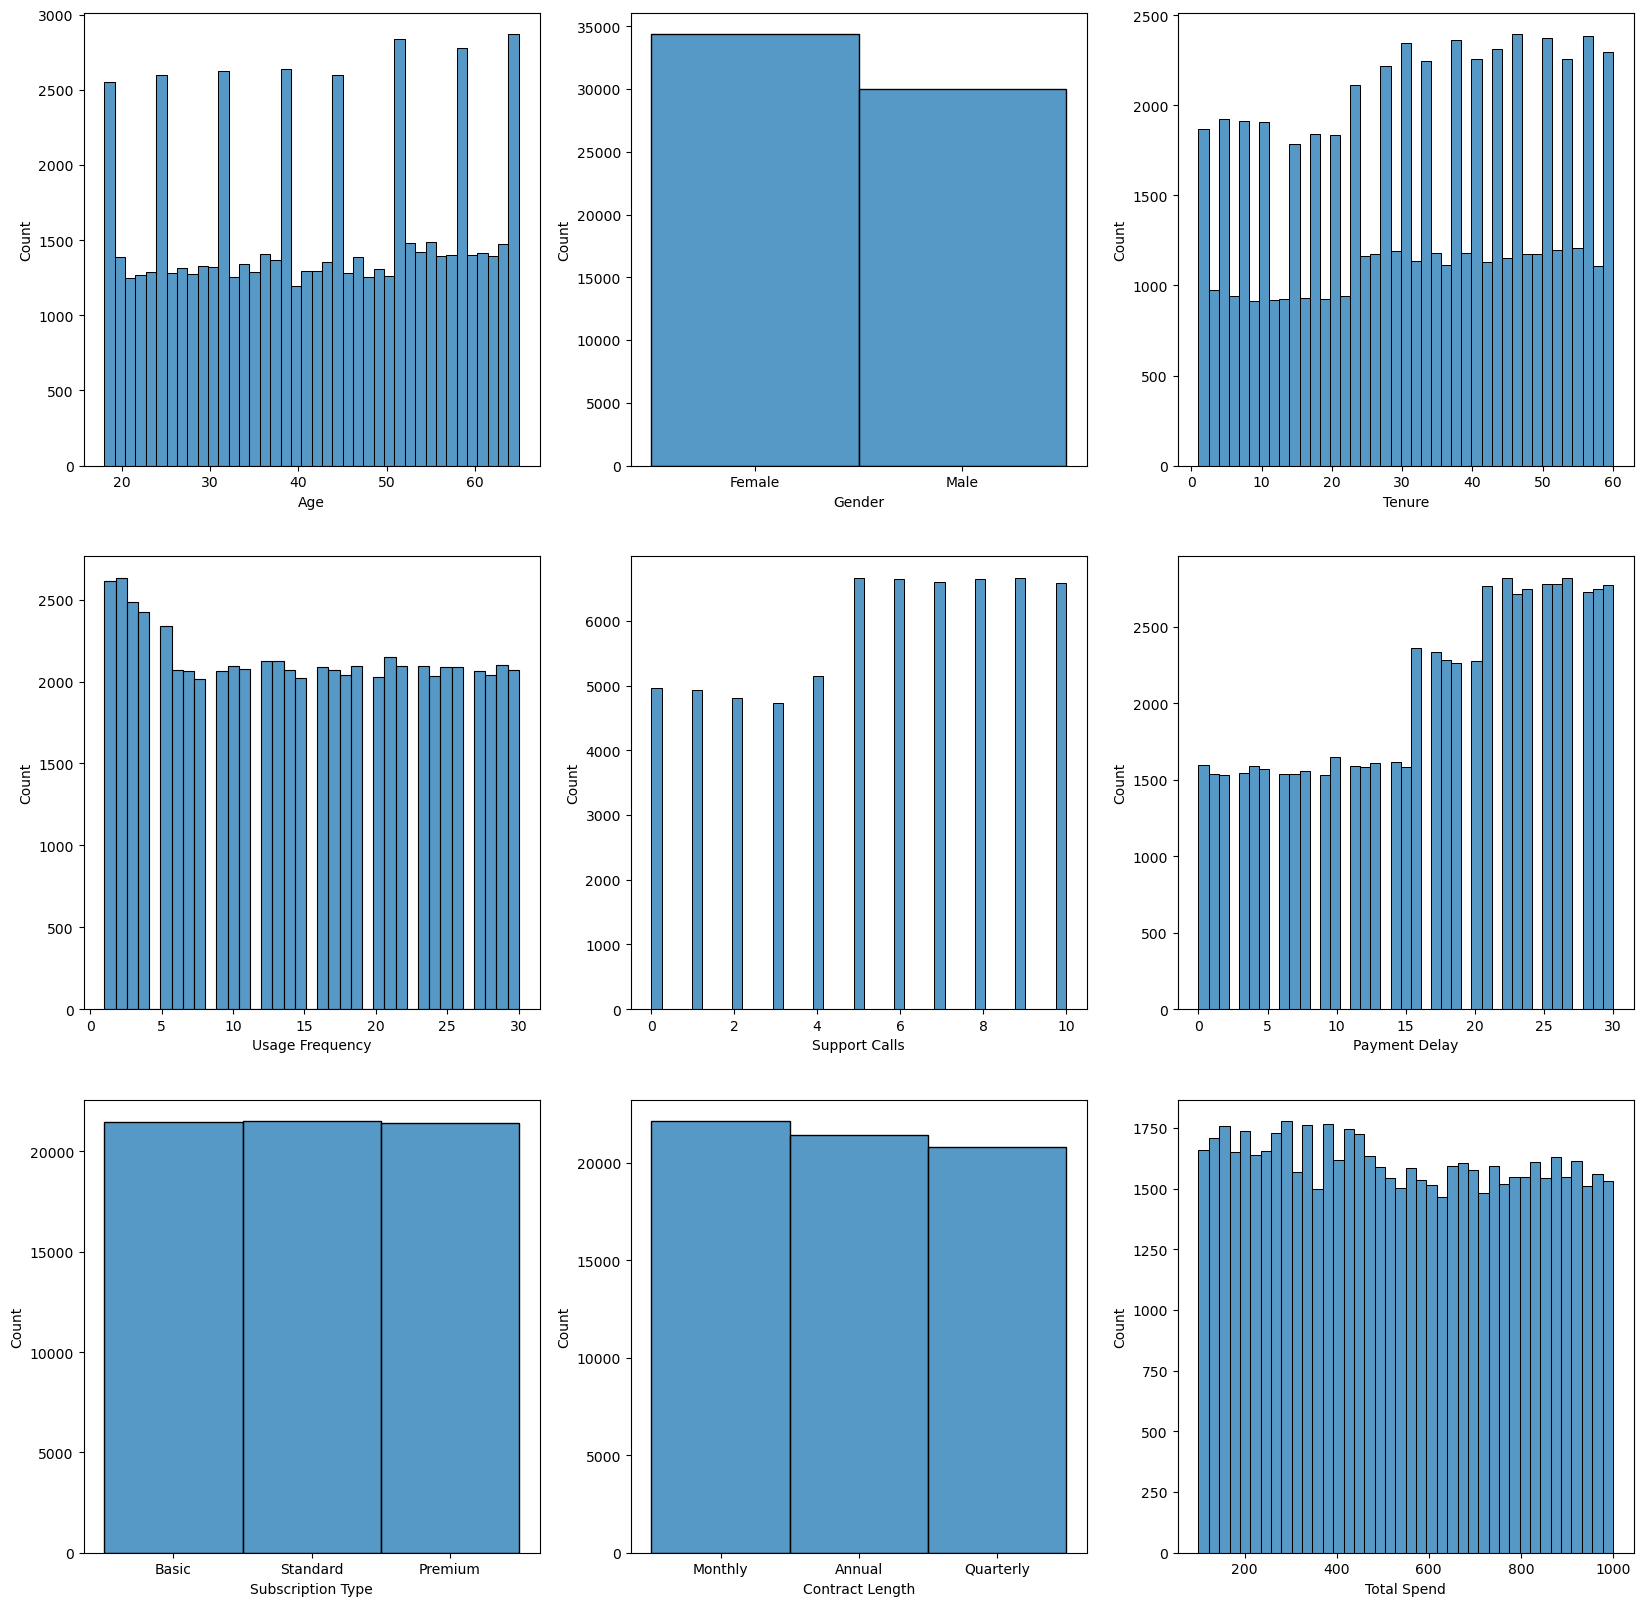

In [233]:
nrows, ncols = 3,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,20)

for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x = df.columns[attr], data = df, ax=axs[i][j])

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 원핫 인코딩
df = pd.get_dummies(df, columns=['Gender', 'Contract Length', 'Subscription Type'], drop_first=True)


Accuracy: 0.9981
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10186
           1       1.00      1.00      1.00      9127

    accuracy                           1.00     19313
   macro avg       1.00      1.00      1.00     19313
weighted avg       1.00      1.00      1.00     19313



<function matplotlib.pyplot.show(close=None, block=None)>

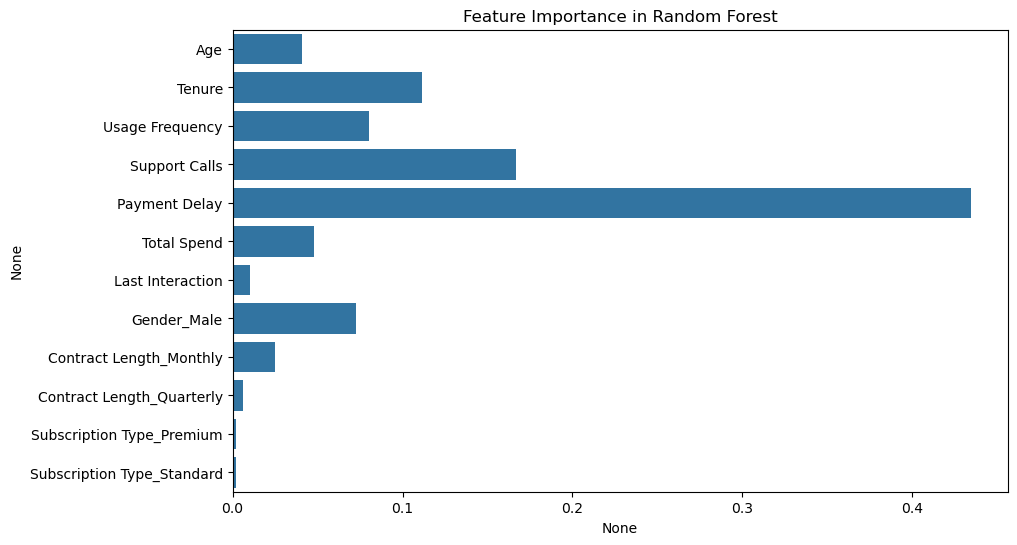

In [235]:
#랜덤포레스트 모델 사용
X = df.drop(columns=['Churn','CustomerID'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Random Forest')
plt.show

왜 이렇게 정확하게 나오지...? 싶어서 confusion matrix로 확인해봤습니다.
다 맞는건 아니네요... 왜 이런지 잘 모르겠습니다 ㅜㅜ

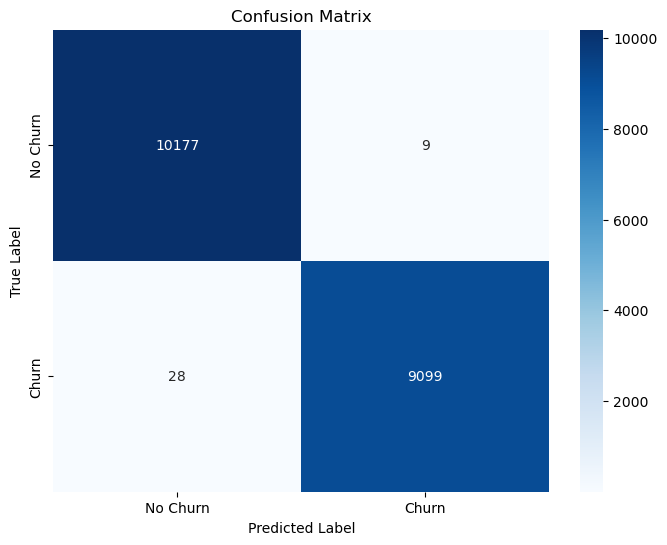

In [237]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<lifelines.CoxPHFitter: fitted with 64374 total observations, 33881 right-censored observations>
             duration col = 'Tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 64374
number of events observed = 30493
   partial log-likelihood = -296000.54
         time fit was run = 2024-09-10 13:50:33 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
Age                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
Usage Frequency            -0.02      0.98      0.00           -0.02           -0.02                0.98                0.98
Support Calls               0.09      1.10      0.00            0.09            0.10                1.09                1.10
Payment Delay               0.08      1.08      0.00            0.08            0.08                1.08                1.08
Total Spend                -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Last Interaction            0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Gender_Male                -0.40      0.67      0.01           -0.42           -0.37                0.66                0.69
Contract Length_Monthly     0.09      1.09      0.01            0.06            0.11                1.06                1.12
Contract Length_Quarterly  -0.06      0.94      0.01           -0.09           -0.03                0.92                0.97
Subscription Type_Premium  -0.03      0.97      0.01           -0.05            0.00                0.95                1.00
Subscription Type_Standard -0.01      0.99      0.01           -0.04            0.02                0.96                1.02

                            cmp to      z      p  -log2(p)
covariate                                                 
Age                           0.00  15.23 <0.005    171.53
Usage Frequency               0.00 -26.41 <0.005    508.13
Support Calls                 0.00  47.42 <0.005       inf
Payment Delay                 0.00  92.05 <0.005       inf
Total Spend                   0.00 -15.15 <0.005    169.90
Last Interaction              0.00   0.14   0.89      0.17
Gender_Male                   0.00 -33.57 <0.005    818.24
Contract Length_Monthly       0.00   6.39 <0.005     32.46
Contract Length_Quarterly     0.00  -4.10 <0.005     14.58
Subscription Type_Premium     0.00  -1.81   0.07      3.85
Subscription Type_Standard    0.00  -0.64   0.52      0.94
---
Concordance = 0.70
Partial AIC = 592023.09
log-likelihood ratio test = 15493.98 on 11 df
-log2(p) of ll-ratio test = inf

<Axes: xlabel='log(HR) (95% CI)'>

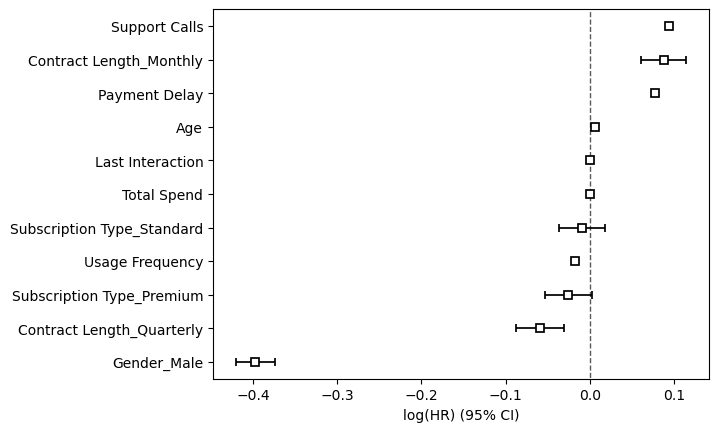

In [238]:
# Cox Proportional Hazards Model 사용
from lifelines import CoxPHFitter
cph = CoxPHFitter()
Cox_X = df.drop(columns = ['CustomerID'])
cph.fit(Cox_X, duration_col='Tenure', event_col='Churn')
cph.print_summary()
cph.plot()